In [498]:
# Data exploration

import pandas as pd

# Read data

df = pd.read_csv('../DataSources/HNP_Stats_CSV/HNP_StatsData.csv')

In [499]:
df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,140.180526,140.810248,141.664168,142.324951,143.456933,144.331150,...,107.697715,105.501833,103.222825,100.963526,99.491703,99.085572,97.413585,96.181442,NaN,NaN
1,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Adults (ages 15-49) newly infected with HIV,SH.HIV.INCD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Africa Eastern and Southern,AFE,"Age at first marriage, female",SP.DYN.SMAM.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Africa Eastern and Southern,AFE,"Age at first marriage, male",SP.DYN.SMAM.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa Eastern and Southern,AFE,Age dependency ratio (% of working-age populat...,SP.POP.DPND,89.594604,89.873370,90.191721,90.574678,90.952719,91.346821,...,85.499375,84.957551,84.439468,83.930980,83.342388,82.692059,81.968963,81.189988,80.386304,NaN
8,Africa Eastern and Southern,AFE,"Age dependency ratio, old",SP.POP.DPND.OL,5.626944,5.598776,5.571718,5.549702,5.534236,5.526348,...,5.509918,5.544147,5.584600,5.631777,5.677017,5.718424,5.733111,5.706199,5.662143,NaN
9,Africa Eastern and Southern,AFE,"Age dependency ratio, young",SP.POP.DPND.YG,83.668705,83.936992,84.243994,84.613140,84.994512,85.398509,...,78.874913,78.311969,77.798386,77.297024,76.690679,76.028564,75.310862,74.565149,73.801353,NaN


In [500]:
# The data is organized by country, indicador and a series of years. The first 4 columns are metadata, the rest are the years 1960-2022. First we will keep only >2020 years.

df = df.drop(df.columns[4:64], axis=1)

df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,97.413585,96.181442,NaN,NaN
1,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Adults (ages 15-49) newly infected with HIV,SH.HIV.INCD,NaN,NaN,NaN,NaN
5,Africa Eastern and Southern,AFE,"Age at first marriage, female",SP.DYN.SMAM.FE,NaN,NaN,NaN,NaN
6,Africa Eastern and Southern,AFE,"Age at first marriage, male",SP.DYN.SMAM.MA,NaN,NaN,NaN,NaN
7,Africa Eastern and Southern,AFE,Age dependency ratio (% of working-age populat...,SP.POP.DPND,81.968963,81.189988,80.386304,NaN
8,Africa Eastern and Southern,AFE,"Age dependency ratio, old",SP.POP.DPND.OL,5.733111,5.706199,5.662143,NaN
9,Africa Eastern and Southern,AFE,"Age dependency ratio, young",SP.POP.DPND.YG,75.310862,74.565149,73.801353,NaN


In [501]:
# Now we will create 3 dataframes, one for each year (2020, 2021, 2022) with the first 4 columns and the corresponding year.

df_2020 = df[['Country Name','Country Code', 'Indicator Name', 'Indicator Code', '2020']]


# For each data frame, we will reorganize the data to join all the indicators of the same country as columns, and the values as rows. 

df_2020 = df_2020.pivot_table(index=['Country Name','Country Code'], columns='Indicator Name', values='2020').reset_index()





In [502]:
# List of indicators

(df_2020.columns).tolist()


['Country Name',
 'Country Code',
 'AIDS estimated deaths (UNAIDS estimates)',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Adults (ages 15+) and children (0-14 years) living with HIV',
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
 'Adults (ages 15+) living with HIV',
 'Adults (ages 15-49) newly infected with HIV',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old',
 'Age dependency ratio, young',
 'Age population, age 00, female, interpolated',
 'Age population, age 00, male, interpolated',
 'Age population, age 01, female, interpolated',
 'Age population, age 01, male, interpolated',
 'Age population, age 02, female, interpolated',
 'Age population, age 02, male, interpolated',
 'Age population, age 03, female, interpolated',
 'Age population, age 03, male, interpolated',
 'Age population, age 04, female, interpolated',
 'Age populatio

In [503]:
# Load HNP_StatsCountry.csv to get the country names

df_country = pd.read_csv('../DataSources/HNP_Stats_CSV/HNP_StatsCountry.csv')

# Get the country Code list that has no Currency Unit (it is not a country)

df_country = df_country[df_country['Currency Unit'].isnull()]

# Get the country names

country_names = df_country['Country Code'].tolist()

# Filter the data frame to keep only the countries that is NOT the country_names list

df_2020 = df_2020[~df_2020['Country Code'].isin(country_names)]



In [504]:
# Now we will explore which indicators are more available for each year, drop all with >25% of missing values and keep only the ones with >75% of values.

# 2020
df_2020 = df_2020.dropna(thresh=0.75*len(df_2020), axis=1)

# List of Top missing indicators

(df_2020.isnull().sum()).sort_values(ascending=False).head(50)

# Drop all Age Population interpolated indicators (Columns that ends on ' interpolated')

df_2020 = df_2020.loc[:,~df_2020.columns.str.contains(' interpolated')]



In [505]:
# Build an index of missing values over the population: A country with too many missing values, and a low population, will be dropped. A country with too many missing values, and a high population, will be kept. 
df_2020['Total Missing Values'] = df_2020.isnull().sum(axis=1)

df_2020['Normalized Missing Values'] = df_2020['Total Missing Values'] / df_2020['Total Missing Values'].max()
df_2020['Normalized Population'] = df_2020['Population, total'] / df_2020['Population, total'].max()

# Penalized index
penalty_factor = 2  # Penality factor for low population countries
df_2020['Penalized Missing Values'] = df_2020['Normalized Missing Values'] * (1 / df_2020['Normalized Population']) * penalty_factor

# Combined Penalized index
df_2020['Missing Values Index'] = df_2020['Normalized Missing Values'] + df_2020['Penalized Missing Values']

# results
df_2020.sort_values(by=['Missing Values Index'], ascending=False).head(100)

Indicator Name,Country Name,Country Code,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Birth rate, crude (per 1,000 people)",Current health expenditure (% of GDP),Current health expenditure per capita (current US$),"Current health expenditure per capita, PPP (current international $)",...,"Unemployment, total (% of total labor force)",Urban population,Urban population (% of total population),Urban population growth (annual %),Women's share of population ages 15+ living with HIV (%),Total Missing Values,Normalized Missing Values,Normalized Population,Penalized Missing Values,Missing Values Index
222,St. Martin (French part),MAF,15.221,49.364533,14.718972,34.645561,15.768,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,96,0.969697,0.000023,84068.404997,84069.374694
90,Gibraltar,GIB,11.982,59.423892,31.953989,27.469903,10.844,NaN,NaN,NaN,...,NaN,32709.0,100.000,0.073401,NaN,91,0.919192,0.000023,79309.775118,79310.694310
137,Liechtenstein,LIE,3.052,49.510069,27.621326,21.888743,9.100,NaN,NaN,NaN,...,NaN,5587.0,14.416,1.025465,NaN,95,0.959596,0.000027,69877.482639,69878.442235
208,Sint Maarten (Dutch part),SXM,24.846,27.248120,11.374436,15.873684,10.000,NaN,NaN,NaN,...,NaN,42310.0,100.000,1.673101,NaN,93,0.939394,0.000030,62660.306683,62661.246077
5,American Samoa,ASM,30.191,53.028094,9.876093,43.152001,12.700,NaN,NaN,NaN,...,NaN,40255.0,87.153,-2.415019,NaN,96,0.969697,0.000033,59249.578642,59250.548339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Croatia,HRV,8.895,55.675030,33.580505,22.094525,8.900,7.765023,1094.532837,2228.970236,...,7.510,2329561.0,57.553,0.108620,10.0,1,0.010101,0.002868,7.042817,7.052918
14,Austria,AUT,5.363,50.495087,28.818958,21.676129,9.400,11.474260,5585.088379,6400.895378,...,5.360,5238479.0,58.748,0.812573,27.2,2,0.020202,0.006319,6.393968,6.414170
151,Mauritania,MRT,78.855,84.097096,6.083924,78.013172,33.427,3.355730,59.049248,186.950363,...,11.137,2488943.0,55.327,4.077189,47.1,1,0.010101,0.003188,6.336870,6.346971
113,Israel,ISR,7.580,66.786242,19.690264,47.095978,19.200,8.319502,3867.404541,3456.981010,...,4.330,8531985.0,92.587,1.856607,26.6,2,0.020202,0.006530,6.187034,6.207236


In [506]:
# Check the list of country name (to list) with the 10% max values

df_2020[df_2020['Missing Values Index'] > df_2020['Missing Values Index'].quantile(0.8)]['Country Name'].tolist()




['American Samoa',
 'Andorra',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas, The',
 'Barbados',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'Curacao',
 'Dominica',
 'Faroe Islands',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guam',
 'Hong Kong SAR, China',
 'Isle of Man',
 'Kiribati',
 'Kosovo',
 'Liechtenstein',
 'Macao SAR, China',
 'Marshall Islands',
 'Micronesia, Fed. Sts.',
 'Monaco',
 'Nauru',
 'New Caledonia',
 'Northern Mariana Islands',
 'Palau',
 'Puerto Rico',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Sint Maarten (Dutch part)',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Martin (French part)',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Virgin Islands (U.S.)']

In [507]:
# As we can see we have problems with SAR territories, so we will drop them: Macao SAR, China; Hong Kong SAR, China.

df_2020 = df_2020[df_2020['Country Name'] != 'Macao SAR, China']
df_2020 = df_2020[df_2020['Country Name'] != 'Hong Kong SAR, China']

# We will drop Kosovo because it is not recognized by the UN. 

df_2020 = df_2020[df_2020['Country Name'] != 'Kosovo']

# Reset calculations

df_2020['Normalized Missing Values'] = df_2020['Total Missing Values'] / df_2020['Total Missing Values'].max()
df_2020['Normalized Population'] = df_2020['Population, total'] / df_2020['Population, total'].max()

# Penalized index
penalty_factor = 2  # Penality factor for low population countries
df_2020['Penalized Missing Values'] = df_2020['Normalized Missing Values'] * (1 / df_2020['Normalized Population']) * penalty_factor

# Combined Penalized index
df_2020['Missing Values Index'] = df_2020['Normalized Missing Values'] + df_2020['Penalized Missing Values']

df_2020[df_2020['Missing Values Index'] > df_2020['Missing Values Index'].quantile(0.8)]['Country Name'].tolist()




['American Samoa',
 'Andorra',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas, The',
 'Barbados',
 'Bermuda',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cayman Islands',
 'Channel Islands',
 'Curacao',
 'Dominica',
 'Faroe Islands',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guam',
 'Isle of Man',
 'Kiribati',
 'Liechtenstein',
 'Marshall Islands',
 'Micronesia, Fed. Sts.',
 'Monaco',
 'Nauru',
 'New Caledonia',
 'Northern Mariana Islands',
 'Palau',
 'Puerto Rico',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Sint Maarten (Dutch part)',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Martin (French part)',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tonga',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Virgin Islands (U.S.)']

<Axes: xlabel='Total Missing Values', ylabel='Population, total'>

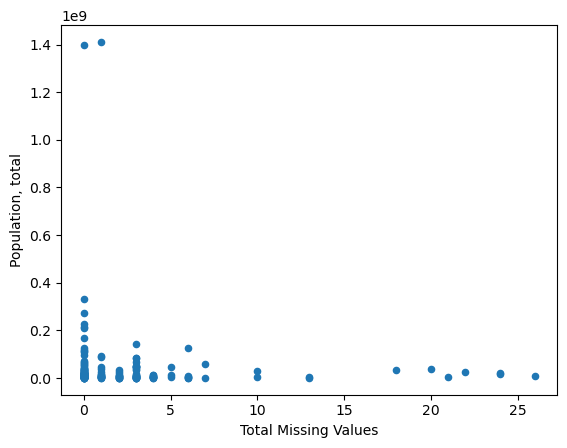

In [508]:
# Drop all countries within the quantile 0.8

df_2020 = df_2020[df_2020['Missing Values Index'] < df_2020['Missing Values Index'].quantile(0.8)]


df_2020.plot.scatter(x='Total Missing Values', y='Population, total')


In [509]:
# what countries has more than 40 missing values?

df_2020[df_2020['Total Missing Values'] > 10]['Country Name'].tolist()

['Albania',
 'Equatorial Guinea',
 "Korea, Dem. People's Rep.",
 'Libya',
 'Saudi Arabia',
 'Somalia',
 'Syrian Arab Republic',
 'West Bank and Gaza',
 'Yemen, Rep.']

In [510]:
# What are the most missing indicators?

(df_2020.isnull().sum()).sort_values(ascending=False).head(50)

Indicator Name
External health expenditure (% of current health expenditure)                               23
External health expenditure per capita, PPP (current international $)                       23
External health expenditure per capita (current US$)                                        23
Prevalence of current tobacco use (% of adults)                                             20
Prevalence of current tobacco use, males (% of male adults)                                 20
Prevalence of current tobacco use, females (% of female adults)                             20
People using at least basic sanitation services, urban  (% of urban population)             16
People using at least basic drinking water services, urban (% of urban population)          16
People practicing open defecation, urban (% of urban population)                            16
Immunization, measles second dose (% of children by the nationally recommended age)         16
Human capital index (HCI), upper bo

In [511]:
df_2020[df_2020['Total Missing Values'] < 15].isnull().sum().sort_values(ascending=False).head(25)

Indicator Name
Prevalence of current tobacco use, males (% of male adults)                            16
External health expenditure per capita, PPP (current international $)                  16
External health expenditure per capita (current US$)                                   16
Prevalence of current tobacco use, females (% of female adults)                        16
Prevalence of current tobacco use (% of adults)                                        16
External health expenditure (% of current health expenditure)                          16
Immunization, measles second dose (% of children by the nationally recommended age)    15
People using at least basic sanitation services, urban  (% of urban population)        14
People practicing open defecation, urban (% of urban population)                       14
People using at least basic drinking water services, urban (% of urban population)     14
Mortality rate, adult, male (per 1,000 male adults)                                  

In [512]:
# Drop all countries that doesnt have "Current health expenditure (% of GDP)" and "Current health expenditure per capita (current US$)"


df_2020 = df_2020[~df_2020['Current health expenditure (% of GDP)'].isnull()]

In [513]:
df_2020.isnull().sum().sort_values(ascending=False).head(25)


Indicator Name
Prevalence of current tobacco use, males (% of male adults)                            16
Prevalence of current tobacco use, females (% of female adults)                        16
Prevalence of current tobacco use (% of adults)                                        16
External health expenditure per capita (current US$)                                   15
Immunization, measles second dose (% of children by the nationally recommended age)    15
External health expenditure per capita, PPP (current international $)                  15
External health expenditure (% of current health expenditure)                          15
People practicing open defecation, urban (% of urban population)                       14
People using at least basic sanitation services, urban  (% of urban population)        14
People using at least basic drinking water services, urban (% of urban population)     14
Mortality rate, adult, male (per 1,000 male adults)                                  

In [514]:
# Drop all the columns with more than 8 missing values

df_2020 = df_2020[df_2020.columns[df_2020.isnull().sum() < 8]]

df_2020.isnull().sum().sort_values(ascending=False).head(25)

Indicator Name
Immunization, HepB3 (% of one-year-old children)                         5
GNI per capita, Atlas method (current US$)                               5
People using at least basic drinking water services (% of population)    5
Women's share of population ages 15+ living with HIV (%)                 3
Immunization, Hib3 (% of children ages 12-23 months)                     2
Rural population growth (annual %)                                       2
Tuberculosis case detection rate (%, all forms)                          1
Population ages 65 and above (% of total population)                     0
Population ages 55-59, female (% of female population)                   0
Population ages 55-59, male                                              0
Population ages 55-59, male (% of male population)                       0
Population ages 60-64, female                                            0
Population ages 60-64, female (% of female population)                   0
Population

In [515]:
# Retrieve the final country list

country_list = df_2020['Country Name'].tolist()

In [516]:
# Save the data frame in folder "Cleaned Data"

df_2020.to_csv('../DataSources/CleanedData/df_2020_HEALTH.csv', index=False)



In [517]:
country_codes = df_2020['Country Code'].tolist()

# Save the country codes in folder "Cleaned Data"

with open('../DataSources/CleanedData/country_codes.txt', 'w') as f:
    for item in country_codes:
        f.write("%s\n" % item)


/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_34549/3532400863.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


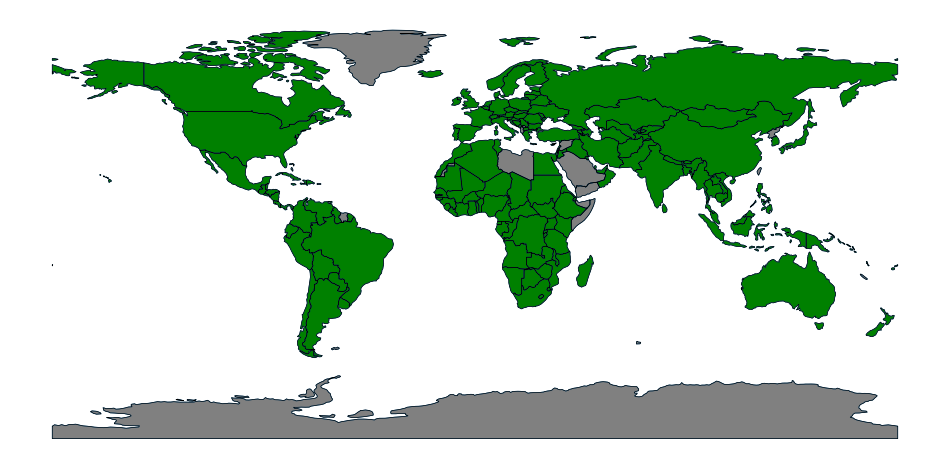

Países en el mapa pero no en la lista:
['W. Sahara', 'Somalia', 'Bahamas', 'Falkland Is.', 'Greenland', 'Fr. S. Antarctic Lands', 'Suriname', 'Puerto Rico', 'Palestine', 'North Korea', 'Syria', 'Albania', 'New Caledonia', 'Taiwan', 'Brunei', 'Yemen', 'Saudi Arabia', 'Antarctica', 'N. Cyprus', 'Libya', 'Somaliland', 'Kosovo']


In [518]:
import geopandas as gpd



world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world['Color'] = 'gray'
world.loc[world['iso_a3'].isin(country_codes), 'Color'] = 'green'

# Map
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=0.5)
world.plot(ax=ax, color=world['Color'], legend=True)

#Configure countries borders color to be black, the background to be transparent

ax.set_facecolor('none')
ax.set_axis_off()

world.boundary.plot(ax=ax, linewidth=0.5, color='black')






#Show map
plt.show()

#Save map
fig.savefig('../DataSources/CleanedData/MapSelectedCountries.png', dpi=500)

# Lista de países que están en el mapa pero no en la lista
paises_en_mapa = world['iso_a3'].tolist()
paises_faltantes = [pais for pais in paises_en_mapa if pais not in country_codes]
# Transform iso_a3 to country name
paises_faltantes = world[world['iso_a3'].isin(paises_faltantes)]['name'].tolist()

print("Países en el mapa pero no en la lista:")
print(paises_faltantes)